In [1]:
%%capture
## [TEMPLATE BEGIN]
## おまじない：実行中のノートブック名からOUTPUT_DIRを決めるコード
from pathlib import Path
from IPython import get_ipython; ip = get_ipython()
if '__vsc_ipynb_file__' in ip.user_ns:
    ## VS Codeで実行されている場合
    THIS_NOTEBOOK_PATH = Path(ip.user_ns['__vsc_ipynb_file__'])
else:
    !pip install ipynbname
    import ipynbname; THIS_NOTEBOOK_PATH = Path(ipynbname.path())
    if "%2F" in THIS_NOTEBOOK_PATH.stem:
        ## Google Colabで実行されている場合
        colab_ip = %system hostname -I   # uses colab magic to get list from bash
        colab_ip = colab_ip[0].strip()   # returns "172.28.0.12"
        colab_port = 9000                # could use 6000, 8080, or 9000
        import requests
        filename = requests.get(f"http://{colab_ip}:{colab_port}/api/sessions").json()[0]["name"]
        THIS_NOTEBOOK_PATH = Path(filename)
    else:
        ## それ以外の場合
        THIS_NOTEBOOK_PATH = THIS_NOTEBOOK_PATH

OUTPUT_DIR = Path("figures") / THIS_NOTEBOOK_PATH.stem
## [TEMPLATE END]

In [2]:
print("File output directory:", OUTPUT_DIR)
# Create the output directory if it does not exist
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

File output directory: figures/_iris_decision_tree


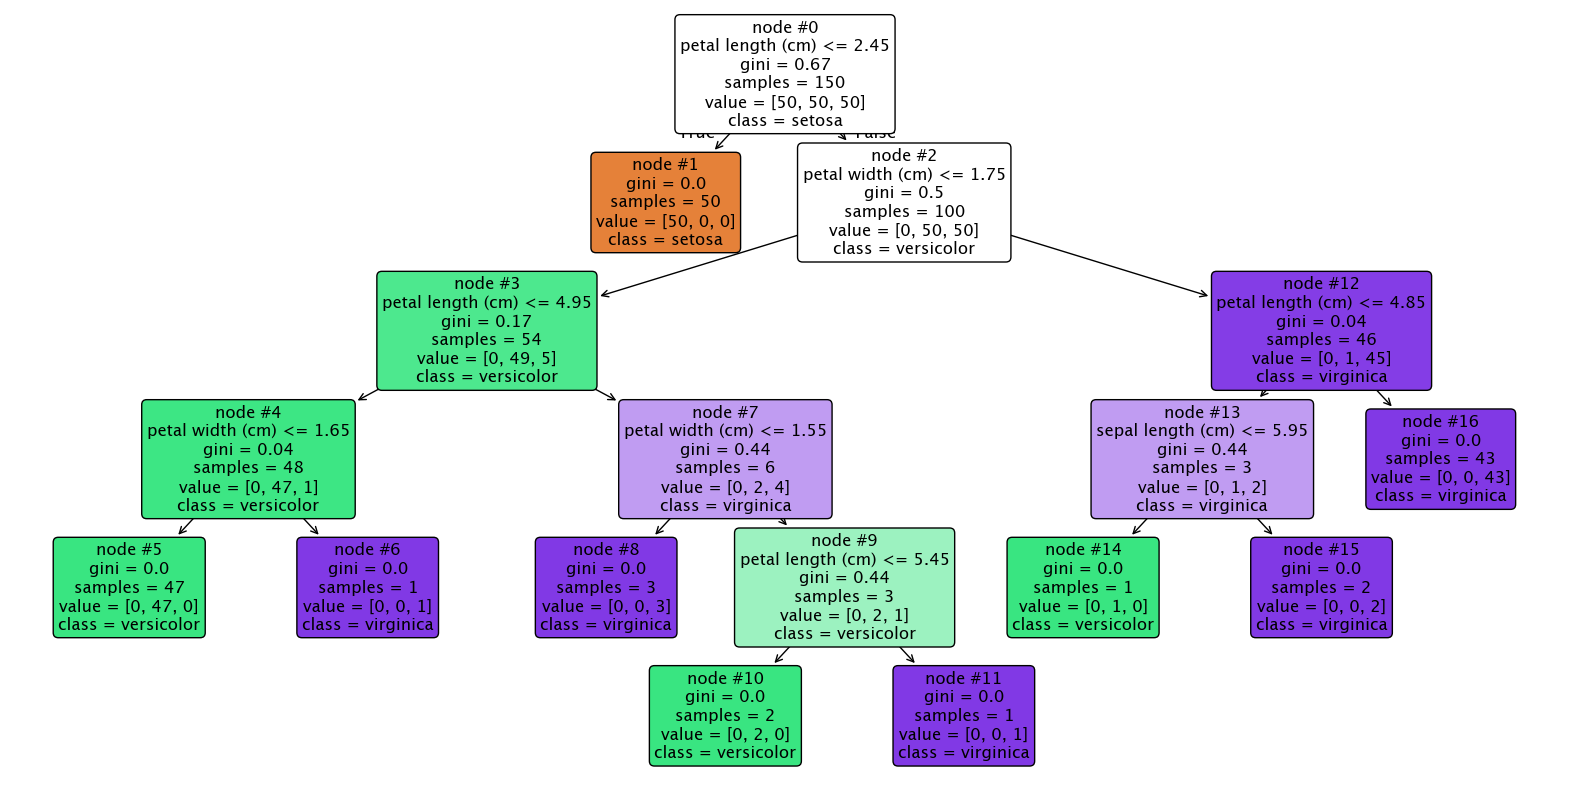

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from pathlib import Path
import matplotlib.image as mpimg
import urllib.request

# Define the color palette
colors = {
    'white': '#FFFFFF',
    'light_gray': '#D3D3D3',
    'gray': '#808080',
    'black': '#000000',
    'green': '#008000',
    'blue': '#0000FF',
    'light_blue': '#ADD8E6',
    'light_light_blue': '#E0FFFF',
    'yellow': '#FFFF00',
    'orange': '#FFA500',
    'dark_orange': '#FF8C00',
    'purple': '#800080'
}

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train a decision tree classifier with a fixed random state
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X, y)

# Plot the decision tree with the specified color palette
plt.figure(figsize=(20,10))
plot_tree(clf, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          filled=True, 
          rounded=True, 
          impurity=True,
          node_ids=True,
          proportion=False,
          precision=2,
          fontsize=12)

# Customize the colors of the nodes
ax = plt.gca()
for node in ax.get_children():
    if isinstance(node, plt.matplotlib.patches.FancyBboxPatch):
        node.set_boxstyle("round,pad=0.3")
        if node.get_edgecolor() == 'black':
            node.set_edgecolor(colors['black'])
        if node.get_facecolor() == (0.0, 0.5, 0.0, 0.5):  # green
            node.set_facecolor(colors['green'])
        if node.get_facecolor() == (0.0, 0.0, 0.5, 0.5):  # blue
            node.set_facecolor(colors['blue'])
        if node.get_facecolor() == (0.5, 0.0, 0.5, 0.5):  # purple
            node.set_facecolor(colors['purple'])
        if node.get_facecolor() == (0.5, 0.5, 0.0, 0.5):  # orange
            node.set_facecolor(colors['orange'])

# Save the decision tree plot
tree_path = OUTPUT_DIR / 'iris_decision_tree.png'
tree_path.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(tree_path, bbox_inches='tight')

# Display the decision tree plot
plt.show()